![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Cross Validation

For this lab, we will build a model on customer churn binary classification problem. You will be using `files_for_lab/Customer-Churn.csv` file.

<h1 style="color: #00BFFF;">00 |</h1>

- Import the required libraries and modules that you would need.

In [1]:
# 📚 Basic libraries
import pandas as pd # data manipulation
import numpy as np # numerical operations
import matplotlib.pyplot as plt # 2D visualizations
import warnings # warning messages management

# 🤖 Machine Learning
from sklearn.preprocessing import MinMaxScaler # data scaler
from sklearn.tree import DecisionTreeClassifier # New ! Decision Tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # train/test sets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay # roc curve, confussion matrix & displayer

In [2]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [3]:
# 🔧 Basic functions
def explore_data(data): # sum & returns duplicates, NaN & empty spaces
    duplicate_rows = data.duplicated().sum()
    nan_values = data.isna().sum()
    empty_spaces = data.eq(' ').sum()
    import pandas as pd
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {data.duplicated().sum()} duplicate rows. Also;")
    return exploration

<h1 style="color: #00BFFF;">00 | Logistic Regression</h1>

<h1 style="color: #00BFFF;">01 | Data Extraction</h1>

In [4]:
churnData = pd.read_csv('Customer-Churn.csv')
churnData.head(5) # call of the churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


<h1 style="color: #00BFFF;">02 | EDA</h1>

In [5]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')

<h1 style="color: #00BFFF;">03 | Data Cleaning</h1>

In [6]:
churnData.duplicated().sum()

49

In [7]:
# Let's drop the duplicates
churnData = churnData.drop_duplicates()

In [8]:
churnData.duplicated().sum()

0

In [9]:
# So... apart from nulls, duplicates, what else we can check?
churnData.eq(' ').sum() # empty spaces ofc, eq = an empty space & sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# Muahahaha, there are ofc some empty spaces we are not gonna miss

In [11]:
churnData['TotalCharges'] = churnData['TotalCharges'].replace(' ', np.nan)  # replacing it with NaN 
churnData = churnData.dropna(subset=['TotalCharges']) # and dropping them like NaN

In [12]:
churnData.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<h1 style="color: #00BFFF;">04 | Data Pre-Processing</h1>

In [13]:
X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']] # Selecting the features from the lab
y = churnData['Churn'] # Is our customer churn or not?

In [14]:
# StandardScaler dosen't make any sense, since it's not normal distributed.
# We will use minmax, even to seniorcitizen (it will not affect the model)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

<h1 style="color: #00BFFF;">05 | Modeling</h1>

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [16]:
model = LogisticRegression() # We pick our model
model.fit(X_train,y_train) # We fit the training data into the model

LogisticRegression()

In [17]:
predictions = model.predict(X_test)

<h1 style="color: #00BFFF;">06 | Reporting</h1>

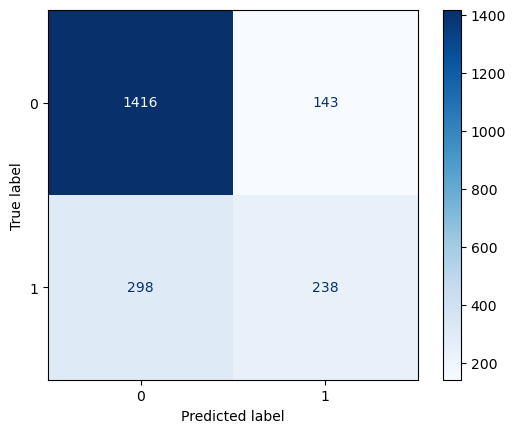


              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1559
         Yes       0.62      0.44      0.52       536

    accuracy                           0.79      2095
   macro avg       0.73      0.68      0.69      2095
weighted avg       0.77      0.79      0.78      2095



In [18]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

print("")
print(classification_report(y_test, predictions))

<h1 style="color: #00BFFF;">00 | SMOTE</h1>

1. Apply SMOTE for upsampling the data

    - Use logistic regression to fit the model and compute the accuracy of the model.
    - Use decision tree classifier to fit the model and compute the accuracy of the model.
    - Compare the accuracies of the two models.

<h3 style="color: #008080;">SMOTE</h3>

In [19]:
from imblearn.over_sampling import SMOTE # Oversampling librarie technique

In [20]:
# Selecting our library
smote = SMOTE()

In [21]:
y = churnData['Churn']
X = churnData.select_dtypes(include=[np.number]) # Selecting Numericals
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [22]:
# Normalazing the data
transformer = StandardScaler().fit(X)

# Transformation
X = transformer.transform(X)

# Using RandomUnderSampler
X_sm, y_sm = smote.fit_resample(X, y)

# We define train and test for X and Y
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=100)

# test_size = We give 30% for testing and 70% for testing
# random_state = it'll improve the model to divide always the model in the same way

In [23]:
y.value_counts()

No     5133
Yes    1850
Name: Churn, dtype: int64

In [24]:
y_sm.value_counts()

Yes    5133
No     5133
Name: Churn, dtype: int64

In [25]:
# We traing the training dataset using Logistic Regression
logistic = LogisticRegression(random_state=0).fit(X_train, y_train)

# Predictions
predictions = logistic.predict(X_test)

logistic.score(X_test, y_test)

0.7301948051948052

In [26]:
logistic_5 = classification_report(y_test, predictions)
print(logistic_5)

              precision    recall  f1-score   support

          No       0.74      0.73      0.73      1564
         Yes       0.72      0.73      0.73      1516

    accuracy                           0.73      3080
   macro avg       0.73      0.73      0.73      3080
weighted avg       0.73      0.73      0.73      3080



In [27]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_report = classification_report(y_test, lr_pred)
print('Logistic Regression Classification Report:')
print(lr_report)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_report = classification_report(y_test, dt_pred)
print('Decision Tree Classification Report:')
print(dt_report)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

          No       0.74      0.73      0.73      1564
         Yes       0.72      0.73      0.73      1516

    accuracy                           0.73      3080
   macro avg       0.73      0.73      0.73      3080
weighted avg       0.73      0.73      0.73      3080

Decision Tree Classification Report:
              precision    recall  f1-score   support

          No       0.75      0.74      0.75      1564
         Yes       0.74      0.75      0.74      1516

    accuracy                           0.75      3080
   macro avg       0.75      0.75      0.75      3080
weighted avg       0.75      0.75      0.75      3080



In [28]:
# Decision Tree Classification is slightly better, 1% for each class, with SMOTE. let's see for TomeLinks

<h1 style="color: #00BFFF;">00 | TomeLinks</h1>

2. Apply TomekLinks for downsampling

    - It is important to remember that it does not make the two classes equal but only removes the points from the majority class that are close to other points in minority class.
    - Use logistic regression to fit the model and compute the accuracy of the model.
    - Use decision tree classifier to fit the model and compute the accuracy of the model.
    - Compare the accuracies of the two models.
    - You can also apply this algorithm one more time and check the how the imbalance in the two classes changed from the last time.


<h3 style="color: #008080;">TomeLinks</h3>

In [29]:
from imblearn.under_sampling import TomekLinks # Undersampling librarie technique

In [30]:
# Selecting our library
tl = TomekLinks(sampling_strategy='majority')

In [31]:
y = churnData['Churn']
X = churnData.select_dtypes(include=[np.number]) # Selecting Numericals
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [32]:
# Normalazing the data
transformer = StandardScaler().fit(X)

# Transformation
X = transformer.transform(X)

# Using RandomUnderSampler
X_tl, y_tl = tl.fit_resample(X, y)

# We define train and test for X and Y
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.3, random_state=100)

# test_size = We give 30% for testing and 70% for testing
# random_state = it'll improve the model to divide always the model in the same way

In [33]:
y.value_counts()

No     5133
Yes    1850
Name: Churn, dtype: int64

In [34]:
y_tl.value_counts()

No     4623
Yes    1850
Name: Churn, dtype: int64

In [35]:
# We traing the training dataset using Logistic Regression
logistic = LogisticRegression(random_state=0).fit(X_train, y_train)

# Predictions
predictions = logistic.predict(X_test)

logistic.score(X_test, y_test)

0.7914521112255407

In [36]:
logistic_6 = classification_report(y_test, predictions)
print(logistic_6)

              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1397
         Yes       0.66      0.53      0.59       545

    accuracy                           0.79      1942
   macro avg       0.75      0.71      0.72      1942
weighted avg       0.78      0.79      0.78      1942



In [37]:
from sklearn.metrics import classification_report

# Logistic Regression
lr_tl = LogisticRegression()
lr_tl.fit(X_train, y_train)
lr_tl_pred = lr_tl.predict(X_test)
lr_tl_report = classification_report(y_test, lr_tl_pred)
print('Logistic Regression Classification Report after TomekLinks:')
print(lr_tl_report)

# Decision Tree
dt_tl = DecisionTreeClassifier()
dt_tl.fit(X_train, y_train)
dt_tl_pred = dt_tl.predict(X_test)
dt_tl_report = classification_report(y_test, dt_tl_pred)
print('Decision Tree Classification Report after TomekLinks:')
print(dt_tl_report)


Logistic Regression Classification Report after TomekLinks:
              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1397
         Yes       0.66      0.53      0.59       545

    accuracy                           0.79      1942
   macro avg       0.75      0.71      0.72      1942
weighted avg       0.78      0.79      0.78      1942

Decision Tree Classification Report after TomekLinks:
              precision    recall  f1-score   support

          No       0.83      0.83      0.83      1397
         Yes       0.56      0.56      0.56       545

    accuracy                           0.75      1942
   macro avg       0.70      0.70      0.70      1942
weighted avg       0.75      0.75      0.75      1942



In [38]:
# In case of Tomelinks, downsampling, we got worst results with the DecisionTree predicting the Yes